# Stage 3: Plots
In this notebook we will create some plots of our crawled and processed data. We create a histogram per vaccine, one general histogram and one final plot to see the acceptance of some COVID19 vaccines.

In [1]:
from lithops.storage.cloud_proxy import open, os
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np

In [2]:
def ls(path):
    paths = []
    for root, _, files in os.walk(path):
        for file in files:
            paths.append(root+"/"+file)
    return paths

In [3]:
def process_vaccine(vaccine_path):
    my_headers = [ "vaccine","id","date","loc","geo","sentiment"]
    with open(vaccine_path, mode="r") as f:
        df = pd.read_csv(f, names=my_headers, header=None)
    plot_df = pd.DataFrame()
    plot_df[df['vaccine'][0]] = df['sentiment'].head(17000)
    return plot_df

In [4]:
def append_df(df1, df2):
    return pd.concat([df1.rename(columns={df1.columns[0]:'Vaccination'}), df2.rename(columns={df2.columns[0]:'Vaccination'})])

In [5]:
def bin_vaccine(df):
    pos = df[df[df.columns[0]] >= 0.05].count()[0]
    neg = df[df[df.columns[0]] <= -0.05].count()[0]
    neut = df.count()[0]-(pos + neg)
    bin_df = pd.DataFrame(columns=['Vaccine', 'Positive', 'Neutral', 'Negative'])
    return bin_df.append({'Vaccine':df.columns[0], 'Positive':pos, 'Neutral':neut, 'Negative':neg}, ignore_index=True)  

List all the elements in the Processed folder of the COS, where one csv per vaccine should be stored and then process each vaccine.

In [6]:
paths = ls("Processed")
res = list(map(process_vaccine, paths))

Make a global histogram to see the global impressions about the COVID19 vaccination process

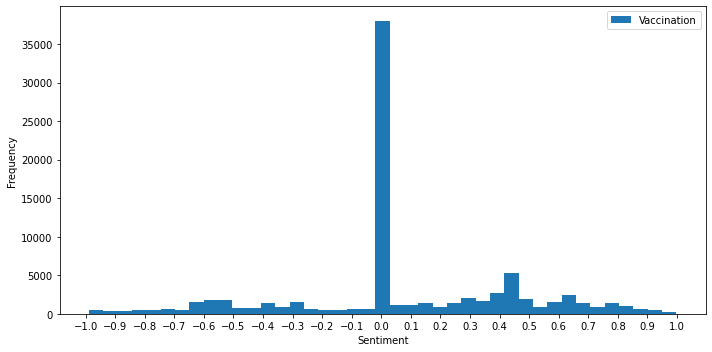

In [7]:
appended_df = reduce(append_df, res)
hist_ax = appended_df.plot(kind='hist', bins=41, xticks=np.arange(-1, 1.1, 0.1), figsize=(10, 5))
hist_ax.set_xlabel('Sentiment')
plt.tight_layout()

Make one histogram per vaccine

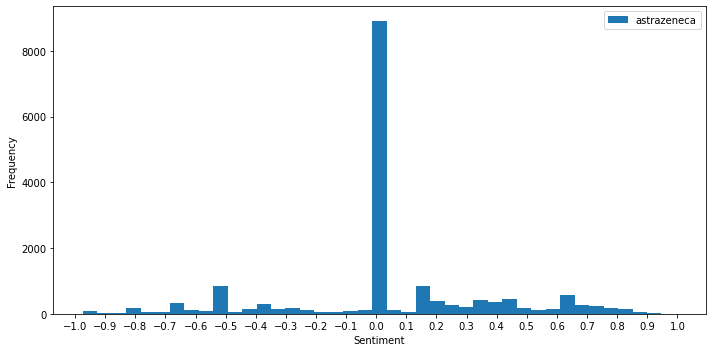

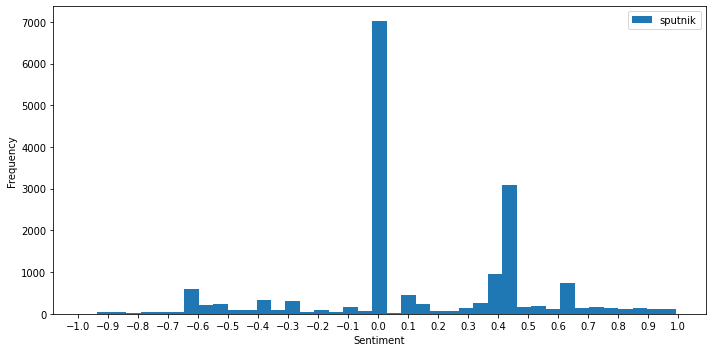

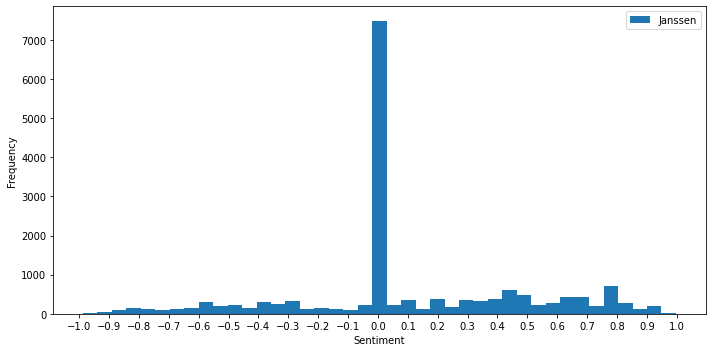

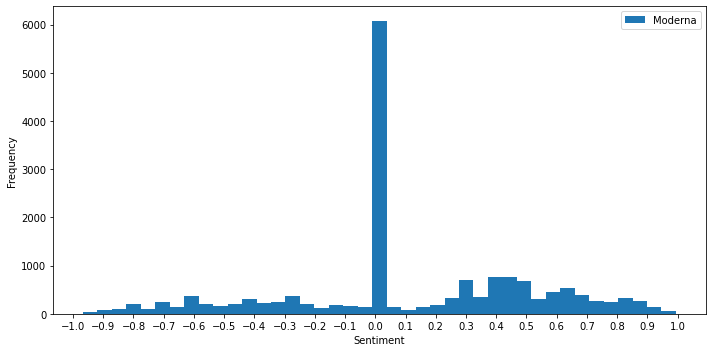

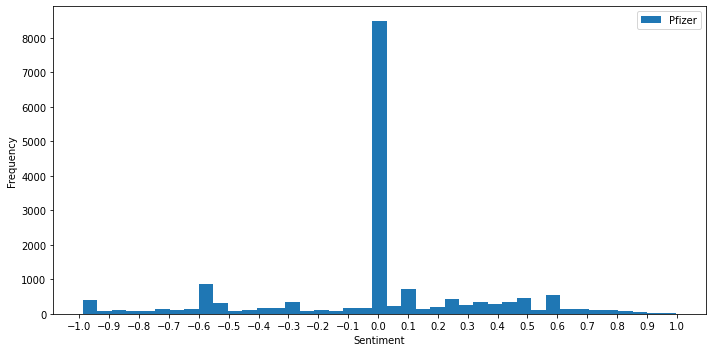

In [8]:
for vaccine in res:
    hist_ax = vaccine.plot(kind='hist', bins=41, xticks=np.arange(-1, 1.1, 0.1), figsize=(10, 5))
    hist_ax.set_xlabel('Sentiment')
    plt.tight_layout()

Finally, classifay the data with positive (>= 0.05), neutral (> -0.05 and < 0.05) and negative (<= -0.05) sentiment of each vaccine and plot it in a stacked bar plot

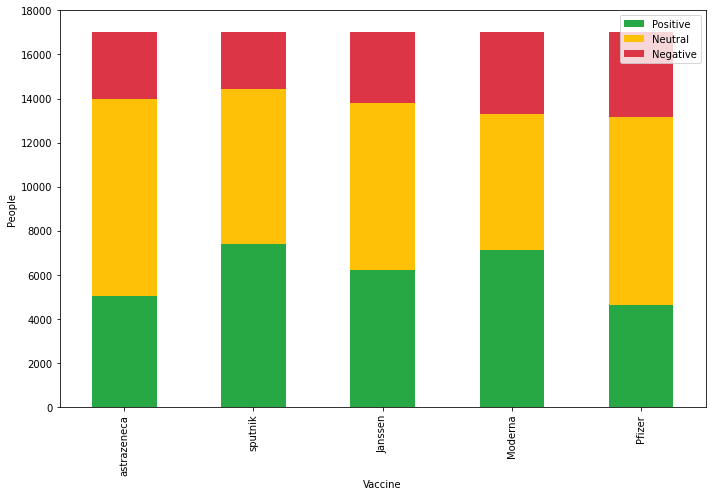

In [9]:
bin_dataset = list(map(bin_vaccine, res))
bin_datased_joined = reduce(append_df, bin_dataset)
bin_dataset_ax = bin_datased_joined.plot(x='Vaccination', kind='bar', stacked=True, color={'Positive': '#28a745', 'Negative':'#dc3545', 'Neutral':'#ffc107'}, yticks=np.arange(0, 18001, 2000), figsize=(10, 7))
bin_dataset_ax.set_xlabel('Vaccine')
bin_dataset_ax.set_ylabel('People')
plt.tight_layout()